<a href="https://colab.research.google.com/github/mehul8825/Doodle_Classifer/blob/main/doodleclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quickdraw

from quickdraw import QuickDrawDataGroup
import os
from PIL import Image

# Step 1: Define categories and set up base output directory
categories = ["rainbow", "dragon", "eye"]
base_output_dir = "Class_images"

# if not os.path.exists(base_output_dir):
#     os.makedirs(base_output_dir)

# Step 2: Function to fetch and save drawings for a category
def save_drawings(category, max_drawings=1000):
    # Create a subcategory folder
    output_dir = os.path.join(base_output_dir, category)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Fetch drawings for the category
    print(f"Fetching {max_drawings} drawings for '{category}'...")
    group = QuickDrawDataGroup(category, max_drawings=max_drawings)

    # Save each drawing as an image
    for i, drawing in enumerate(group.drawings):
        image = drawing.image
        file_path = os.path.join(output_dir, f"{category}_{i+1}.png")
        image.save(file_path)
        print(f"Saved {file_path}")


# Step 3: Process all categories
for category in categories:
    save_drawings(category, max_drawings=1000)
    print("-" * 50)  # Separator between categories

print("All categories processed!")

Fetching 1000 drawings for 'rainbow'...
downloading rainbow from https://storage.googleapis.com/quickdraw_dataset/full/binary/rainbow.bin
download complete
loading rainbow drawings
load complete
Saved Class_images/rainbow/rainbow_1.png
Saved Class_images/rainbow/rainbow_2.png
Saved Class_images/rainbow/rainbow_3.png
Saved Class_images/rainbow/rainbow_4.png
Saved Class_images/rainbow/rainbow_5.png
Saved Class_images/rainbow/rainbow_6.png
Saved Class_images/rainbow/rainbow_7.png
Saved Class_images/rainbow/rainbow_8.png
Saved Class_images/rainbow/rainbow_9.png
Saved Class_images/rainbow/rainbow_10.png
Saved Class_images/rainbow/rainbow_11.png
Saved Class_images/rainbow/rainbow_12.png
Saved Class_images/rainbow/rainbow_13.png
Saved Class_images/rainbow/rainbow_14.png
Saved Class_images/rainbow/rainbow_15.png
Saved Class_images/rainbow/rainbow_16.png
Saved Class_images/rainbow/rainbow_17.png
Saved Class_images/rainbow/rainbow_18.png
Saved Class_images/rainbow/rainbow_19.png
Saved Class_imag

In [ ]:
# libraries
!pip install tensorflow

import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Define constants
IMG_SIZE = 28  # QuickDraw images are 28x28 pixels
NUM_CLASSES = 3  # "rainbow", "dragon", "eye"
BASE_DIR = "Class_images"
CATEGORIES = ["rainbow", "dragon", "eye"]

In [ ]:
# Load and preprocess images
def load_images():
    data = []
    labels = []

    for category_idx, category in enumerate(CATEGORIES):
        folder_path = os.path.join(BASE_DIR, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            try:
                # Load image, convert to grayscale, resize to 28x28, and normalize
                img = Image.open(img_path).convert("L")  # Grayscale
                img = img.resize((IMG_SIZE, IMG_SIZE))
                img_array = np.array(img) / 255.0  # Normalize to [0, 1]
                data.append(img_array)
                labels.append(category_idx)  # Label as index (0, 1, 2)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    # Convert to numpy arrays and add channel dimension for CNN (28, 28, 1)
    data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    labels = np.array(labels)
    return data, labels

In [ ]:
# Load data
data, labels = load_images()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
# model
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.3499 - loss: 1.0998 - val_accuracy: 0.3283 - val_loss: 1.0989
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4304 - loss: 1.0368 - val_accuracy: 0.6050 - val_loss: 0.7536
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6194 - loss: 0.7315 - val_accuracy: 0.6667 - val_loss: 0.6678
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6330 - loss: 0.6772 - val_accuracy: 0.6883 - val_loss: 0.6028
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6965 - loss: 0.6037 - val_accuracy: 0.7383 - val_loss: 0.5634
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7270 - loss: 0.6009 - val_accuracy: 0.7550 - val_loss: 0.5278
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7743 - loss: 0.5277 - val_accuracy: 0.8300 - val_loss: 0.4109
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8203 - loss: 0.4334 - val_accuracy: 0.8517 - v

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9216 - loss: 0.2545
Test accuracy: 0.9133


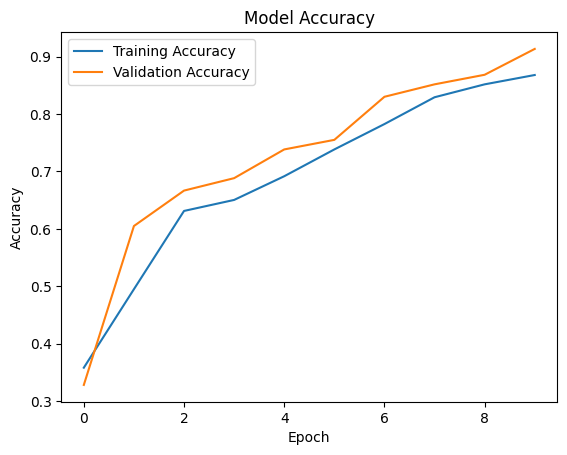

In [ ]:
# Plot results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Save model
model.save("quickdraw_model.h5")
print("Model saved as 'quickdraw_model.h5'")

Model saved as 'quickdraw_model.h5'


## **--End--**